# Backpropagation

This notebook demonstrates the backpropagation algorithm for a network with a single layer using the sigmoid activation function.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

In [2]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of the sigmoid activation function
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [3]:
# Utility functions
def printif(s, x):
    if x == True:
        print(s)

        
div = '----------------\n'

In [4]:
# Training instances
training = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

targets = np.array([
    [0],
    [1],
    [1],
    [1]
])

In [5]:
# Set the learning rate
lr = 0.1  

# Number of epochs to run
total_epochs = 10000

# Print progress every output_epochs
output_epochs = 5000  

# Initialize weights and bias
weights = np.array([[0.1], [0.2]])
bias = 0.3

In [6]:
# Track errors for plotting
errors = []

# Run the backpropagation algorithm
for epoch in range(total_epochs):
    show = (epoch % output_epochs == 0)
    printif(f'{div}\nEpoch {epoch}\n\n', show)
                 
    # Feedforward input
    in_forward = np.dot(training, weights) + bias
    printif((f'Weighted inputs:\n{in_forward}'), show)
    
    # Feedforward output
    out_forward = sigmoid(in_forward)
    printif((f'\nSigmoid output:\n{out_forward}'), show)
    
    # Calculate the error
    err = out_forward - targets
    printif((f'\nError:\n{err}'), show)
    
    # Record error
    errors += [err]
    
    # Use chain rule to calculate derivatives
    grad_components = err * dsigmoid(out_forward)
    grad = np.dot(training.T, grad_components)
    printif((f'\nGradient:\n{grad}'), show)
    
    # Gradient descent step
    weights -= lr * grad
    printif(f'\nNew Weights:\n{weights}', show)
    
    for i in grad_components:
        bias -= lr * i

    printif(f'\nNew Bias: {bias}', show)

----------------

Epoch 0


Weighted inputs:
[[0.3]
 [0.5]
 [0.4]
 [0.6]]

Sigmoid output:
[[0.57444252]
 [0.62245933]
 [0.59868766]
 [0.64565631]]

Error:
[[ 0.57444252]
 [-0.37754067]
 [-0.40131234]
 [-0.35434369]]

Gradient:
[[-0.1718082 ]
 [-0.16576139]]

New Weights:
[[0.11718082]
 [0.21657614]]

New Bias: [0.31252247]
----------------

Epoch 5000


Weighted inputs:
[[-3.14920933]
 [ 3.8606332 ]
 [ 3.86032531]
 [10.87016784]]

Sigmoid output:
[[0.04112244]
 [0.97937949]
 [0.97937328]
 [0.99998098]]

Error:
[[ 4.11224441e-02]
 [-2.06205058e-02]
 [-2.06267244e-02]
 [-1.90168172e-05]]

Gradient:
[[-0.0040977 ]
 [-0.00409645]]

New Weights:
[[7.00994441]
 [7.01025217]]

New Bias: [-3.14941791]


In [7]:
# Output final weights and bias
print(f'Weights: {weights[0, 0]:.3f}, {weights[1, 0]:.3f}\n'
      f'Bias:    {bias[0]:.3f}')


Weights: 8.429, 8.429
Bias:    -3.868


In [8]:
# Output prediction for the instance (0, 1)
single_point = np.array([0, 1])
linear_model = np.dot(single_point, weights) + bias

print(f'Linear model: {linear_model[0]:.3f}\n'
      f'Output:       {sigmoid(linear_model)[0]:.3f}')

Linear model: 4.561
Output:       0.990


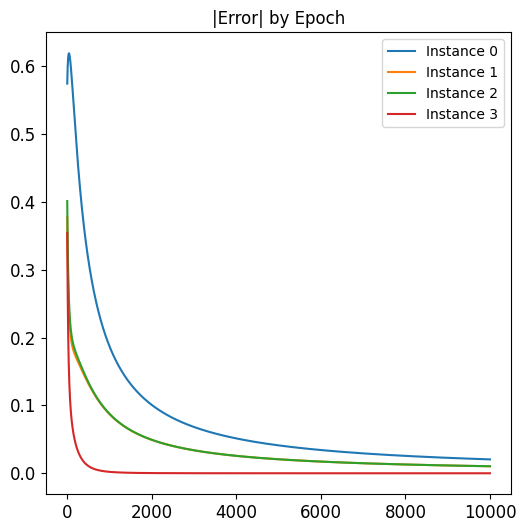

In [9]:
# Plot change in errors as epochs progress
plot_errors = np.abs(np.concatenate(errors, axis=1))
plt.subplots(figsize=(6, 6))
for e in plot_errors:
    plt.plot(e)
plt.title('|Error| by Epoch')
plt.legend(['Instance 0', 'Instance 1', 'Instance 2', 'Instance 3'])
plt.show()